# RATINGS PREDICTION

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

Data Collection Phase

You have to scrape at least 20000 rows of data. You can scrape more data as well, it’s up to you. more the data better the model In this section you need to scrape the reviews of different laptops, Phones, Headphones, smart watches, Professional Cameras, Printers, Monitors, Home theater, Router from different ecommerce websites. Basically, we need these columns1) reviews of the product. 2) rating of the product. You can fetch other data as well, if you think data can be useful or can help in the project. It completely depends on your imagination or assumption.

Hint: • Try to fetch data from different websites. If data is from different websites, it will help our model to remove the effect of over fitting. • Try to fetch an equal number of reviews for each rating, for example if you are fetching 10000 reviews then all ratings 1,2,3,4,5 should be 2000. It will balance our data set. • Convert all the ratings to their round number, as there are only 5 options for rating i.e., 1,2,3,4,5. If a rating is 4.5 convert it 5.

Model Building Phase

After collecting the data, you need to build a machine learning model. Before model building do all data preprocessing steps involving NLP. Try different models with different hyper parameters and select the best model. Follow the complete life cycle of data science. Include all the steps like1. Data Cleaning 2. Exploratory Data Analysis 3. Data Preprocessing 4. Model Building 5. Model Evaluation 6. Selecting the best mode

# Importing Libraries

In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc

# Load the dataset

In [2]:
df=pd.read_csv("Rating_train_set.csv")  # read the data
df

,Unnamed: 0,Review,Ratings,Text
0,0,Overall worthy Laptop,5,I boght this laptop for mainly multitasking an...
1,1,Durable solid laptop.,NaN,The laptop is good for this price point.\nFirs...
2,2,Perfect except the battery backup.,5,Lasts 4 hours of lite work and 2x4gb ram has t...
3,3,Good Value for money Laptop,NaN,Thin Gaming Laptop with good build quality. Go...
4,4,Excellent laptop,5,Excellent service by Amazon. Good laptop with ...
...,...,...,...,...
12569,12569,Wonderful,5,best product
12570,12570,Simply awesome,5,Wonderful.and nice product
12571,12571,Classy product,5,This one is absolutely perfect for work produc...
12572,12572,Classy product,5,Awesome 👍\nJust go for it... After lot of rese...


Observations: 1)From dataset we can see that there are unnecessary columns are present like Unnamed: 0. 2)Null Values are present. 3) No. of 12574 rows & No. of 4 columns are present in the dataset.

# Dimensions of Dataset

In [3]:
# check the no. of rows & column & finding the count of missing value
print(df.shape)
print("-"*60)
print(df.isna().sum())
print("-"*60)
#printing the summary of data type
df.info() 

(12574, 4)
------------------------------------------------------------
Unnamed: 0       0
Review           5
Ratings       4755
Text           223
dtype: int64
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12574 entries, 0 to 12573
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12574 non-null  int64 
 1   Review      12569 non-null  object
 2   Ratings     7819 non-null   object
 3   Text        12351 non-null  object
dtypes: int64(1), object(3)
memory usage: 393.1+ KB


In [4]:
# Lets first delate the irrelavant columns
df.drop(columns=['Unnamed: 0'],axis=1, inplace=True)

In [5]:
#Recheck the Dataset
df.head(2)

,Review,Ratings,Text
0,Overall worthy Laptop,5,I boght this laptop for mainly multitasking an...
1,Durable solid laptop.,NaN,The laptop is good for this price point.\nFirs...


Now our data looks good now lets check Statistical Summary of dataset 

# Statistical Summary

In [6]:
# Lets understand data at high level check the stastics of dataset
df.describe(include='all')

,Review,Ratings,Text
count,12569,7819,12351
unique,2544,6,3865
top,Good,5,Good
freq,326,6378,199



Observations: 1) Irrelevant values are present 2)we have categorical data type(object type) 3)outliers are present in the dataset 

Also, we can see that the rating column has count 6 it should be 5 now lets check with value .count method

In [7]:
df['Ratings'].value_counts()

5    6378
4     877
3     198
-     168
1     168
2      30
Name: Ratings, dtype: int64

As we see the 6 catergory means null value now lets deal with it by using imputer tech.

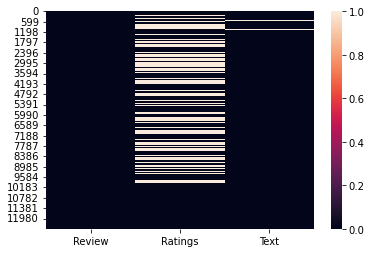

In [8]:
# Checking null value by plotting heatmap
sns.heatmap(df.isnull())
plt.show()

In [9]:
#first remove duplicates & recheck the size
df.drop_duplicates(inplace=True)

print(df.shape)

(9727, 3)


Found duplicates and deleated.

In [10]:
# Reset the index
df=df.reset_index()

In [11]:
df=df.drop(columns='index')

In [12]:
df

,Review,Ratings,Text
0,Overall worthy Laptop,5,I boght this laptop for mainly multitasking an...
1,Durable solid laptop.,NaN,The laptop is good for this price point.\nFirs...
2,Perfect except the battery backup.,5,Lasts 4 hours of lite work and 2x4gb ram has t...
3,Good Value for money Laptop,NaN,Thin Gaming Laptop with good build quality. Go...
4,Excellent laptop,5,Excellent service by Amazon. Good laptop with ...
...,...,...,...
9722,I LOVED IT!,5,"First off, this monitor is great simply becaus..."
9723,Delightful,4,In this Price the monitor is awesome one can b...
9724,Wonderful,5,Nice picture Quality
9725,Wonderful,5,best product


# EDA

# Data Pre-Processing 

In [13]:
#Converting all capital letter into small letters
for i in df:
    df[i] =df[i].str.lower()
df

,Review,Ratings,Text
0,overall worthy laptop,5,i boght this laptop for mainly multitasking an...
1,durable solid laptop.,NaN,the laptop is good for this price point.\nfirs...
2,perfect except the battery backup.,5,lasts 4 hours of lite work and 2x4gb ram has t...
3,good value for money laptop,NaN,thin gaming laptop with good build quality. go...
4,excellent laptop,5,excellent service by amazon. good laptop with ...
...,...,...,...
9722,i loved it!,5,"first off, this monitor is great simply becaus..."
9723,delightful,4,in this price the monitor is awesome one can b...
9724,wonderful,5,nice picture quality
9725,wonderful,5,best product


In [14]:
# Replacing '-' value with nan to reat well by using Imputer tech.
df['Ratings']=df['Ratings'].replace('-', np.nan)

In [15]:
#Checking again the counts
df['Ratings'].value_counts()

5    4779
4     425
3      80
1      52
2      19
Name: Ratings, dtype: int64

In [16]:
df['Ratings'].mode()

0    5
Name: Ratings, dtype: object

In [17]:
df['Ratings']=df['Ratings'].replace(np.nan, '5').astype(int)

In [18]:
#Checking again the counts
df['Ratings'].value_counts()

5    9151
4     425
3      80
1      52
2      19
Name: Ratings, dtype: int64

In [19]:
# Checking special characater if any
import string
alphabet = string.punctuation
list1=list(alphabet)
print(list1)

# contain the given list if strings
print(df[df['Review'].isin(list1)])

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
     Review  Ratings                                               Text
135       -        5                   nice to operate, feel premium...
224       -        5                                               nice
373       -        5                                 very nyc product 👍
997       -        5                                    congratulations
2115      -        5  this is a genuine phone by google. i really li...
3378      -        5  awesome product from jbl. the main draw back i...
3586      -        5                                               good
3809      -        5  top base quality and sound is very high too. v...
4243      -        5                          good see and nice product
4653      -        5                                i like this product
4922      -        5  first of all its 1.8” di

In [20]:
# contain the given list if strings
print(df[df['Text'].isin(list1)])

                                              Review  Ratings Text
66                          really loved this laptop        5    -
95             amazing product and lightening speed.        5    -
153            voice is little low eals all are good        5    -
173    perfect basic touchscreen laptop in 20k range        5    -
355                awesome look and good performance        5    -
...                                              ...      ...  ...
7914                 one of the best earphones ever.        5    -
8147                                           great        5    -
8170              very good and awesome tw earbud...        5    -
8559        awesome sound quality value for money...        5    -
8688  only earphone that lasted for more than a year        5    -

[109 rows x 3 columns]


As we see in our dataset we have some special charactor so, lets deal with it first.

In [21]:
# remove special character
df['Review'] = df['Review'].str.replace(".", "")
df['Review'] = df['Review'].str.replace("!", "")
df['Review'] = df['Review'].str.replace("&", "")
df['Review'] = df['Review'].str.replace("#", "")
df['Review'] = df['Review'].str.replace("@", "")
df['Review'] = df['Review'].str.replace("4", "")
df['Review'] = df['Review'].str.replace("\n", "")
df['Review'] = df['Review'].str.replace("=", "")
df['Review'] = df['Review'].str.replace("-", "")
df['Review'] = df['Review'].str.replace("_", "")
df['Review'] = df['Review'].str.replace("/", "")
df['Review'] = df['Review'].str.replace("^", "")
df['Review'] = df['Review'].str.replace(",", "")

In [22]:
df['Text'] = df['Text'].str.replace(".", "")
df['Text'] = df['Text'].str.replace("!", "")
df['Text'] = df['Text'].str.replace("&", "")
df['Text'] = df['Text'].str.replace("#", "")
df['Text'] = df['Text'].str.replace("@", "")
df['Text'] = df['Text'].str.replace("4", "")
df['Text'] = df['Text'].str.replace("\n", "")
df['Text'] = df['Text'].str.replace("=", "")
df['Text'] = df['Text'].str.replace("-", "")
df['Text'] = df['Text'].str.replace("_", "")
df['Text'] = df['Text'].str.replace("/", "")
df['Text'] = df['Text'].str.replace("^", "")
df['Text'] = df['Text'].str.replace(",", "")
df['Text'] = df['Text'].str.replace("2", "")
df['Text'] = df['Text'].str.replace(":", "")
df['Text'] = df['Text'].str.replace(";", "")
df['Text'] = df['Text'].str.replace("?", "")

In [23]:
df

,Review,Ratings,Text
0,overall worthy laptop,5,i boght this laptop for mainly multitasking an...
1,durable solid laptop,5,the laptop is good for this price pointfirst d...
2,perfect except the battery backup,5,lasts hours of lite work and xgb ram has to b...
3,good value for money laptop,5,thin gaming laptop with good build quality goo...
4,excellent laptop,5,excellent service by amazon good laptop with b...
...,...,...,...
9722,i loved it,5,first off this monitor is great simply because...
9723,delightful,4,in this price the monitor is awesome one can b...
9724,wonderful,5,nice picture quality
9725,wonderful,5,best product


In [24]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=df.columns.values.tolist()
for i in features:
    if df[i].dtype in numerics:
        continue
    cat_col.append(i)
cat_col

['Review', 'Text']

In [25]:
# Lets frist covert categorical data(type & column) into int 
label = LabelEncoder()
for i in cat_col:
    data=label.fit_transform(df[i])
    pd.Series(data)
    df[i]=data

In [26]:
df.head(3)

,Review,Ratings,Text
0,1663,5,1357
1,729,5,3034
2,1677,5,2088


Iterative Imputer

Iterative imputer is a hidden gem of the sklearn library in python. The iterative imputer library provides us with tools to tackle the problem mentioned above. Instead of just replacing values with mean/median, we can have a regressor (Linear/Decision Tree/Random Forest/KNN) to impute missing values. By using the iterative imputer we can intelligently impute the missing values, avoid bias, maintain the relationship between variables, and can get better results.

In [27]:
# Creating null value list which we want to impute by using iterative inputer
data=df[['Review', 'Ratings', 'Text']]

In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()

for i in data:
    df1=imputer.fit_transform(df[[i]])
    pd.Series([df1])
    df[i]=df1

In [29]:
# Rechecking the null values again after treating with Imputer Tech.
print(df.isna().sum())

Review     0
Ratings    0
Text       0
dtype: int64


Now lets move further.

# Data Visualization

# Univariate Plots

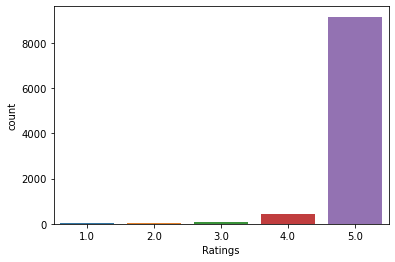

5.0    9151
4.0     425
3.0      80
1.0      52
2.0      19
Name: Ratings, dtype: int64


In [30]:
#plot each class frequency
sns.countplot(x='Ratings',data=df)
plt.show()
print(df['Ratings'].value_counts())

From graph we can see that their are maximum rating count is for 4 & 5 category.

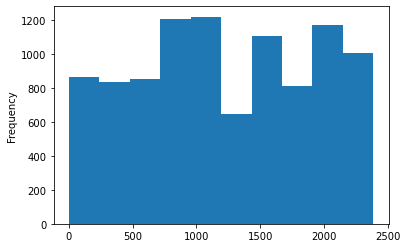

885.0     260
2118.0    192
984.0     161
1523.0    135
743.0     131
         ... 
1934.0      1
1111.0      1
2025.0      1
1891.0      1
1199.0      1
Name: Review, Length: 2388, dtype: int64


In [31]:
#plot each class frequency
df['Review'].plot.hist()
plt.show()
print(df['Review'].value_counts())

From Graph we can see that the maximum review category is 885.

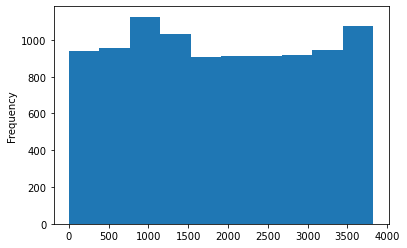

3826.0    179
980.0     165
0.0       109
1076.0     60
2236.0     58
         ... 
3622.0      1
694.0       1
3706.0      1
141.0       1
3729.0      1
Name: Text, Length: 3827, dtype: int64


In [32]:
#plot each class frequency
df['Text'].plot.hist()
plt.show()
print(df['Text'].value_counts())

The maximum no. of text written of 3826 category.

# Bivariant Plot

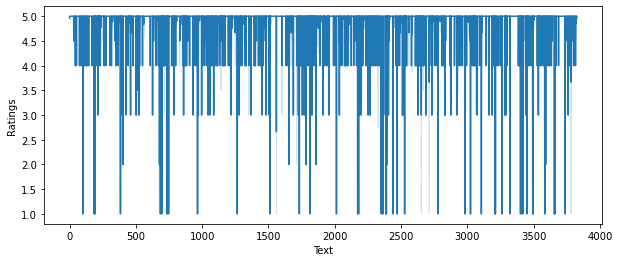

In [33]:
#Bivariant graph
plt.figure(figsize =(10, 4))
sns.lineplot(x ='Text', y ='Ratings', data = df)
plt.show()

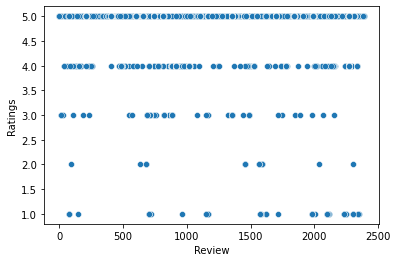

In [34]:
#Bivariant graph
plt.figure(figsize =(6, 4))
sns.scatterplot(x ='Review', y ='Ratings', data = df)
plt.show()

# Lets Check Correlation

In [35]:
df.corr()

,Review,Ratings,Text
Review,1.000000,-0.028266,0.018220
Ratings,-0.028266,1.000000,-0.005997
Text,0.018220,-0.005997,1.000000


From above .corr method we can sse the correlation between independant variable and dependant variable. There are some +ve and -ve correlation with target variable of independant variable. Lets visualise the same by plotting the heatmap.

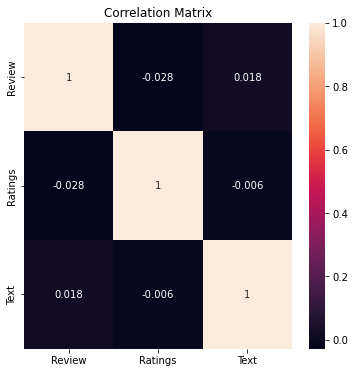

In [36]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation Matrix")
plt.savefig('Colinearity.png')
plt.show()


In [37]:
# Check correlation with target variable
df.corr()['Ratings'].sort_values(ascending = False)

Ratings    1.000000
Text      -0.005997
Review    -0.028266
Name: Ratings, dtype: float64

We can see we have very less relation with target variable.

# Data Distribution

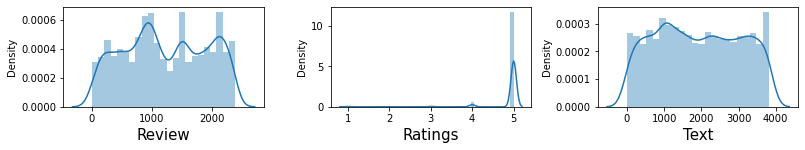

In [38]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in df:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

From graph we can see that the almost every columns have skewness, now lets check with skew values also.

In [39]:
# Check skewness by skew value
df.skew().sort_values(ascending=False)

Text       0.053238
Review     0.008295
Ratings   -6.425951
dtype: float64

skewness is present in target variable, so we are not treating with it & it is imbalanced also so lets deal with it one by one.

In [40]:
# Separate the skewed columns
df1=['Text','Review']

# Using power transformation to remove skewed data
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df[df1]=pt.fit_transform(df[df1].values)

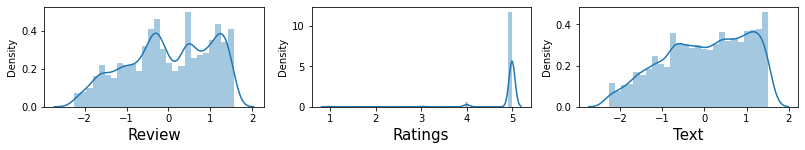

In [41]:
# Distribution after Power Transformation
plt.figure(figsize=(15,20))
plotnumber=1
for column in df:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

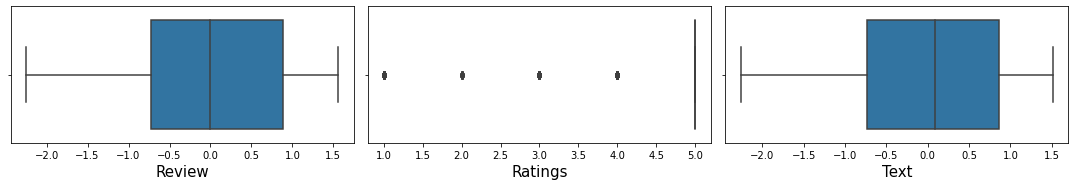

In [42]:
#Let's see the outliers in the dataset by using box plot or Graphical analysis of all features
myFig=plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=32:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In rating column outliers are present due to imbalance of data, So lets use resampling tech.

In [43]:
# Divide the dataset into features & target variable for further treatment
x=df.drop('Ratings',axis=1)
y=df['Ratings']
print(x.shape, y.shape)

(9727, 2) (9727,)


# Data stadardization

In [44]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [45]:
#check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
print(vif)

        vif featurs
0  1.000269  Review
1  1.000269    Text


Looking at the VIF factor there is no multicolinarity. lets move further.

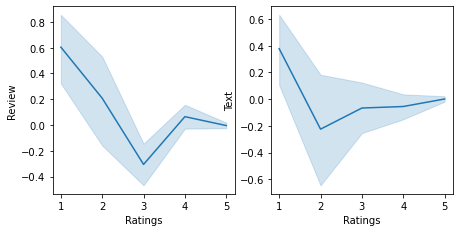

In [46]:
# see how featurs r related to lable(Graphical Analysis)
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.lineplot(y,x[column])
    plotnumber+=1
plt.show()

In [47]:
# data is imbalanced lets use SMOTE before that lets find the best random state

# Find the best Random state

In [48]:
# Lets select the proper random state to build best model by using LogisticRegression

from sklearn.linear_model import LogisticRegression

acc_score_test = 0
acc_score_train = 0
rand_state = 0
for i in range(1,200):
    
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state= i )
    
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    
    y_pred=lr.predict(x_train) # prediction on train data
    r1 =accuracy_score(y_train,y_pred) # accuracy check on train data
    
    pred = lr.predict(x_test)   #prediction on test data
    r2 =accuracy_score(y_test,pred) #accuracy check on test data
    
    if r2 > acc_score_test and r1 > acc_score_train: # selecting max score accuracy
        acc_score_test = r2
        acc_score_train = r1
        rand_state = i
    print(f"at random sate {i}, the training accuracy is:- {acc_score_train}")
    print(f"at random sate {i}, the testing accuracy is:- {acc_score_test}")
    print("\n")
print('Best Training accuracy_score is {} on random state {}'.format(acc_score_train,rand_state))
print('Best Testing accuracy_score is {} on random state {}'.format(acc_score_test,rand_state))

at random sate 1, the training accuracy is:- 0.9399820074540548
at random sate 1, the testing accuracy is:- 0.9439876670092497


at random sate 2, the training accuracy is:- 0.9399820074540548
at random sate 2, the testing accuracy is:- 0.9439876670092497


at random sate 3, the training accuracy is:- 0.9399820074540548
at random sate 3, the testing accuracy is:- 0.9439876670092497


at random sate 4, the training accuracy is:- 0.9399820074540548
at random sate 4, the testing accuracy is:- 0.9439876670092497


at random sate 5, the training accuracy is:- 0.9399820074540548
at random sate 5, the testing accuracy is:- 0.9439876670092497


at random sate 6, the training accuracy is:- 0.9399820074540548
at random sate 6, the testing accuracy is:- 0.9439876670092497


at random sate 7, the training accuracy is:- 0.9399820074540548
at random sate 7, the testing accuracy is:- 0.9439876670092497


at random sate 8, the training accuracy is:- 0.9399820074540548
at random sate 8, the testing acc

at random sate 66, the training accuracy is:- 0.9399820074540548
at random sate 66, the testing accuracy is:- 0.9439876670092497


at random sate 67, the training accuracy is:- 0.9399820074540548
at random sate 67, the testing accuracy is:- 0.9439876670092497


at random sate 68, the training accuracy is:- 0.9399820074540548
at random sate 68, the testing accuracy is:- 0.9439876670092497


at random sate 69, the training accuracy is:- 0.9399820074540548
at random sate 69, the testing accuracy is:- 0.9439876670092497


at random sate 70, the training accuracy is:- 0.9399820074540548
at random sate 70, the testing accuracy is:- 0.9439876670092497


at random sate 71, the training accuracy is:- 0.9399820074540548
at random sate 71, the testing accuracy is:- 0.9439876670092497


at random sate 72, the training accuracy is:- 0.9399820074540548
at random sate 72, the testing accuracy is:- 0.9439876670092497


at random sate 73, the training accuracy is:- 0.9399820074540548
at random sate 73,

at random sate 130, the training accuracy is:- 0.9399820074540548
at random sate 130, the testing accuracy is:- 0.9439876670092497


at random sate 131, the training accuracy is:- 0.9399820074540548
at random sate 131, the testing accuracy is:- 0.9439876670092497


at random sate 132, the training accuracy is:- 0.9399820074540548
at random sate 132, the testing accuracy is:- 0.9439876670092497


at random sate 133, the training accuracy is:- 0.9399820074540548
at random sate 133, the testing accuracy is:- 0.9439876670092497


at random sate 134, the training accuracy is:- 0.9399820074540548
at random sate 134, the testing accuracy is:- 0.9439876670092497


at random sate 135, the training accuracy is:- 0.9399820074540548
at random sate 135, the testing accuracy is:- 0.9439876670092497


at random sate 136, the training accuracy is:- 0.9399820074540548
at random sate 136, the testing accuracy is:- 0.9439876670092497


at random sate 137, the training accuracy is:- 0.9399820074540548
at 

at random sate 196, the training accuracy is:- 0.9399820074540548
at random sate 196, the testing accuracy is:- 0.9439876670092497


at random sate 197, the training accuracy is:- 0.9399820074540548
at random sate 197, the testing accuracy is:- 0.9439876670092497


at random sate 198, the training accuracy is:- 0.9399820074540548
at random sate 198, the testing accuracy is:- 0.9439876670092497


at random sate 199, the training accuracy is:- 0.9399820074540548
at random sate 199, the testing accuracy is:- 0.9439876670092497


Best Training accuracy_score is 0.9399820074540548 on random state 1
Best Testing accuracy_score is 0.9439876670092497 on random state 1


In [49]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 1


In [50]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state= rand_state )
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6808, 2)
(2919, 2)
(6808,)
(2919,)


In [51]:
#Checking the number of classes before fit

from collections import Counter
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({5.0: 6393, 4.0: 296, 3.0: 60, 1.0: 43, 2.0: 16})


In [52]:
# We have imbalance dataset lets use SMOTE
# Lets use of Resampling Techniques to handle Imbalanced Data
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

ove_smp=SMOTE(sampling_strategy = {1: 6393, 2: 6393, 3: 6393, 4: 6393, 5: 6393}) # selecting data for resampling
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)
print(Counter(y_train))
print(Counter(y_train_ns))

Counter({5.0: 6393, 4.0: 296, 3.0: 60, 1.0: 43, 2.0: 16})
Counter({5.0: 6393, 4.0: 6393, 1.0: 6393, 3.0: 6393, 2.0: 6393})


# Lets build the model to predict Ratings

In [53]:
# Imporing ML algorithms and initialisation the same

from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
ada=AdaBoostClassifier()
gb=GradientBoostingClassifier()

from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score, plot_roc_curve, auc

models=[]
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', dt))
models.append(('AdaBoostClassifier', ada))
models.append(('GradientBoostingClassifier', gb))
models.append(('RandomForestClassifier', rfc))


In [54]:
m=[]
score=[]
score2=[]
cv_score=[]
roc_trainscore=[]
roc_testscore=[]
for name, model in models:
    print('***********************',name,'***********************')
    m.append(name)
    model.fit(x_train_ns, y_train_ns)
    print(model)
    y_pred=model.predict(x_train_ns)
    AS=accuracy_score(y_train_ns,y_pred)
    print("Train Report:",AS)
    score.append(AS*100)
    
    pred=model.predict(x_test)
    AS2=accuracy_score(y_test,pred)
    print("Test Report:",AS2)
    score2.append(AS2*100)
    CR=classification_report(y_test,pred)
    print("Classification Report:",CR)
    CM=confusion_matrix(y_test,pred)
    print("Confusion Matrix:", CM)
    
    accuracies= cross_val_score(model, x_train_ns, y_train_ns, cv=5, scoring='accuracy')
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    cv_score.append(accuracies.mean()*100)
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    

*********************** LogisticRegression ***********************
LogisticRegression()
Train Report: 0.31046457062412014
Test Report: 0.06680369989722508
Classification Report:               precision    recall  f1-score   support

         1.0       0.01      0.67      0.01         9
         2.0       0.00      0.67      0.01         3
         3.0       0.01      0.80      0.03        20
         4.0       0.00      0.00      0.00       129
         5.0       0.95      0.06      0.12      2758

    accuracy                           0.07      2919
   macro avg       0.19      0.44      0.03      2919
weighted avg       0.90      0.07      0.11      2919

Confusion Matrix: [[   6    0    2    0    1]
 [   1    2    0    0    0]
 [   1    2   16    0    1]
 [  43   28   51    0    7]
 [ 875  613 1077   22  171]]
Accuracy: 31.02 %
Standard Deviation: 0.16 %
*********************** DecisionTreeClassifier ***********************
DecisionTreeClassifier()
Train Report: 0.9993743156577507


In [55]:
print(len(m),len(score),len(score2),len(cv_score))

5 5 5 5


In [56]:
result = pd.DataFrame({'Model': m, 'Accuracy_train_score': score,'Accuracy_test_score': score2 ,'Cross_val_score':cv_score})
result

,Model,Accuracy_train_score,Accuracy_test_score,Cross_val_score
0,LogisticRegression,31.046457,6.680370,31.015173
1,DecisionTreeClassifier,99.937432,61.356629,78.363835
2,AdaBoostClassifier,53.114344,25.522439,51.055842
3,GradientBoostingClassifier,69.410293,45.940391,68.074456
4,RandomForestClassifier,99.937432,60.397396,81.260754


From above accuraces we can see there are major diffrance in all models test accuracy and cross validation accuracy. Now lets use hyper Tunning Parameter method to get better accuracy. 
From above table i m selecting Decision Tree Classifier is best model as it has least diffrance in accuracy.

# HyperParameter Tuning

In [57]:
# Hyper tuning by using RandomizedSearchCV With dt
from sklearn.model_selection import RandomizedSearchCV

para={'min_samples_split':[7,10,8],'ccp_alpha':[0.25,0.1,0.3,0.092],'max_depth':[2,4,11,10,8,9],'random_state':[20,10,30]}
rand=RandomizedSearchCV(estimator=dt, cv=5,param_distributions=para, scoring = 'accuracy')
rand.fit(x_train_ns,y_train_ns)

print(rand.best_params_)
print(rand.best_score_)

{'random_state': 30, 'min_samples_split': 8, 'max_depth': 11, 'ccp_alpha': 0.25}
0.1999061473486626


In [58]:
dt=DecisionTreeClassifier(random_state=1, min_samples_split=8, max_depth= 4, ccp_alpha= 0.3)

dt.fit(x_train_ns,y_train_ns)
y_pred=model.predict(x_train_ns)
AS=accuracy_score(y_train_ns,y_pred)
print("Train Report:",AS*100)
pred=model.predict(x_test)
AS2=accuracy_score(y_test,pred)
print("Test Report:",AS2*100)
CR=classification_report(y_test,pred)
print("Classification Report:",CR)
CM=confusion_matrix(y_test,pred)
print("Confusion Matrix:", CM)  
accuracies= cross_val_score(model, x_train_ns, y_train_ns, cv=2, scoring='accuracy')
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
cv_score.append(accuracies.mean()*100)
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Train Report: 99.93743156577507
Test Report: 60.3973963686194
Classification Report:               precision    recall  f1-score   support

         1.0       0.01      0.33      0.02         9
         2.0       0.00      0.33      0.01         3
         3.0       0.02      0.30      0.04        20
         4.0       0.12      0.37      0.19       129
         5.0       0.96      0.62      0.75      2758

    accuracy                           0.60      2919
   macro avg       0.22      0.39      0.20      2919
weighted avg       0.91      0.60      0.72      2919

Confusion Matrix: [[   3    1    0    1    4]
 [   0    1    2    0    0]
 [   2    1    6    3    8]
 [   7    6    5   48   63]
 [ 260  210  247  336 1705]]
Accuracy: 78.83 %
Standard Deviation: 0.18 %


As we see there is no change in accuracy and we are getting good accuracy with out hypertunning parameter.

# So, i m selecting DecisionTreeClassifier as best model.

In [60]:
#save model
import pickle
Filename='Finalized_model_Rating_Prediction1.pickle'
pickle.dump(dt,open(Filename,'wb'))

# Lets Predict the Rating for the test data by selected model

In [61]:
df1=pd.read_csv('Rating_testdata.csv')  # read the data
df1

,Unnamed: 0,Review,Text
0,0,Good laptop.,I don't know why people are cribbing so much a...
1,1,Good in the range but not the best,"Firstly , I would like to talk about the scree..."
2,2,Good product,I am writing this review after one month of u...
3,3,Graphics and battery are remarkable..i am sati...,Battery and video quality is remarkable but th...
4,4,What if feel about this laptop,If you going for a coding work then it is goo...
...,...,...,...
9469,9469,Good monitor in the price range,NaN
9470,9470,Better than average,"Abends bestellt, nächsten Mittag schon da - da..."
9471,9471,Good product at this price.,NaN
9472,9472,Best product,Eu sou da área de TI e na minha casa comprei o...


(9474, 3)
------------------------------------------------------------
Unnamed: 0      0
Review          0
Text          764
dtype: int64
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9474 entries, 0 to 9473
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9474 non-null   int64 
 1   Review      9474 non-null   object
 2   Text        8710 non-null   object
dtypes: int64(1), object(2)
memory usage: 222.2+ KB
None


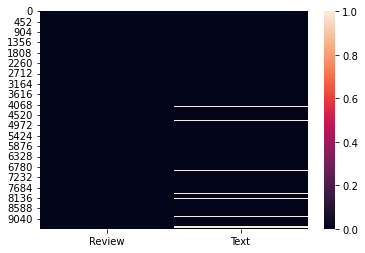

(8325, 2)
                               Review  \
0                        Good laptop.   
1  Good in the range but not the best   
2                        Good product   

                                                Text  
0  I don't know why people are cribbing so much a...  
1  Firstly , I would like to talk about the scree...  
2   I am writing this review after one month of u...  
                               Review  \
0                        good laptop.   
1  good in the range but not the best   
2                        good product   

                                                Text  
0  i don't know why people are cribbing so much a...  
1  firstly , i would like to talk about the scree...  
2   i am writing this review after one month of u...  
['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
     Review                                               

In [62]:
# check the no. of rows & column & finding the count of missing value
print(df1.shape)
print("-"*60)
print(df1.isna().sum())
print("-"*60)
#printing the summary of data type
print(df1.info())

# Lets first delate the irrelavant columns
df1.drop(columns=['Unnamed: 0'],axis=1, inplace=True)

# Checking null value by plotting heatmap
sns.heatmap(df1.isnull())
plt.show()

#first remove duplicates & recheck the size
df1.drop_duplicates(inplace=True)
print(df1.shape)

# Reset the index
df1=df1.reset_index()

df1=df1.drop(columns='index')

print(df1.head(3))

#Converting all capital letter into small letters
for i in df1:
    df1[i] =df1[i].str.lower()
print(df1.head(3))

# Checking special characater if any
import string
alphabet = string.punctuation
list1=list(alphabet)
print(list1)

# contain the given list if strings
print(df1[df1['Review'].isin(list1)])

In [63]:
# remove special character
df1['Review'] = df1['Review'].str.replace(".", "")
df1['Review'] = df1['Review'].str.replace("!", "")
df1['Review'] = df1['Review'].str.replace("&", "")
df1['Review'] = df1['Review'].str.replace("#", "")
df1['Review'] = df1['Review'].str.replace("@", "")
df1['Review'] = df1['Review'].str.replace("4", "")
df1['Review'] = df1['Review'].str.replace("\n", "")
df1['Review'] = df1['Review'].str.replace("=", "")
df1['Review'] = df1['Review'].str.replace("-", "")
df1['Review'] = df1['Review'].str.replace("_", "")
df1['Review'] = df1['Review'].str.replace("/", "")
df1['Review'] = df1['Review'].str.replace("^", "")
df1['Review'] = df1['Review'].str.replace(",", "")

In [64]:
df1['Text'] = df1['Text'].str.replace(".", "")
df1['Text'] = df1['Text'].str.replace("!", "")
df1['Text'] = df1['Text'].str.replace("&", "")
df1['Text'] = df1['Text'].str.replace("#", "")
df1['Text'] = df1['Text'].str.replace("@", "")
df1['Text'] = df1['Text'].str.replace("4", "")
df1['Text'] = df1['Text'].str.replace("\n", "")
df1['Text'] = df1['Text'].str.replace("=", "")
df1['Text'] = df1['Text'].str.replace("-", "")
df1['Text'] = df1['Text'].str.replace("_", "")
df1['Text'] = df1['Text'].str.replace("/", "")
df1['Text'] = df1['Text'].str.replace("^", "")
df1['Text'] = df1['Text'].str.replace(",", "")
df1['Text'] = df1['Text'].str.replace("2", "")
df1['Text'] = df1['Text'].str.replace(":", "")
df1['Text'] = df1['Text'].str.replace(";", "")
df1['Text'] = df1['Text'].str.replace("?", "")

In [65]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=df1.columns.values.tolist()
for i in features:
    if df1[i].dtype in numerics:
        continue
    cat_col.append(i)
print(cat_col)

['Review', 'Text']


In [66]:
# Lets frist covert categorical data(type & column) into int 
label = LabelEncoder()
for i in cat_col:
    data=label.fit_transform(df1[i])
    pd.Series(data)
    df1[i]=data
    
df1.head(3)

,Review,Text
0,1117,1112
1,1110,722
2,1201,45


In [67]:
# Creating null value list which we want to impute by using iterative inputer
data=df1[['Text']]
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()
for i in data:
    df2=imputer.fit_transform(df1[[i]])
    pd.Series([df2])
    df1[i]=df2

In [68]:
# Rechecking the null values again after treating with Imputer Tech.
print(df1.isna().sum())

Review    0
Text      0
dtype: int64


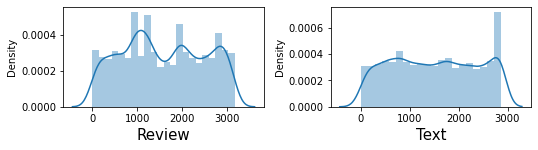

In [69]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in df1:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

Review    0.055674
Text      0.018658
dtype: float64


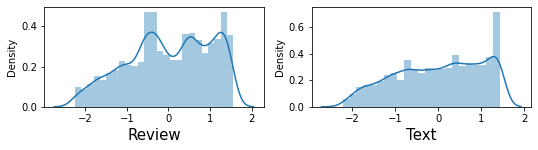

In [70]:
# Check skewness by skew value
print(df1.skew().sort_values(ascending=False))

# Separate the skewed columns
df3=['Text','Review']

# Using power transformation to remove skewed data
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df1[df3]=pt.fit_transform(df1[df3].values)

# Distribution after Power Transformation
plt.figure(figsize=(15,20))
plotnumber=1
for column in df1:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()



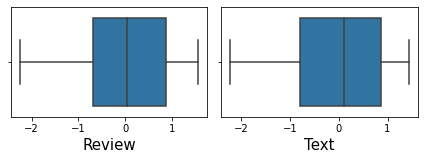

In [71]:
#Let's see the outliers in the dataset by using box plot or Graphical analysis of all features
plotnumber=1
for column in df1:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

# Lets Do the prediction by using selected saved model

In [76]:
df1["predictions"] = df1[['Text','Review']].apply(lambda s: dt.predict(s.values[None])[0], axis=1)

In [77]:
df1["predictions"]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
8320    1.0
8321    1.0
8322    1.0
8323    1.0
8324    1.0
Name: predictions, Length: 8325, dtype: float64